# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

In [33]:
nhanes = da.copy()

In [34]:
nhanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [35]:
nhanes


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [36]:
da["RIAGENDR"] = da.RIAGENDR.replace({1: "Male", 2: "Female",".":np.nan})
da["SMQ020"] = da.SMQ020.replace({1: "Yes", 2: "No",".":np.nan,7:np.nan,9:np.nan})
da

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,Yes,Male,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,Yes,Male,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,Yes,Male,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,No,Female,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,No,Female,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,Yes,Female,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,No,Male,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,Yes,Female,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,Yes,Male,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


Hypothesis proportion males smoking = proportion females smoking
Alternative is they are not equal.

Two population difference in proportions test. T-test for two proportions.

In [17]:
da.groupby("RIAGENDR")["SMQ020"].agg([lambda z: np.mean(z=="Yes"),"size"])

,<lambda_0>,size
RIAGENDR,,
Female,0.304435,2976
Male,0.512142,2759


In [58]:
#drop missing values
dx = da[["SMQ020", "RIAGENDR"]].dropna()
dx.reset_index()
dx

,SMQ020,RIAGENDR
0,Yes,Male
1,Yes,Male
2,Yes,Male
3,No,Female
4,No,Female
...,...,...
5730,Yes,Female
5731,No,Male
5732,Yes,Female
5733,Yes,Male


In [59]:
from scipy import stats
import scipy.stats.distributions as dist


p = dx.groupby("RIAGENDR")["SMQ020"].agg([lambda z: np.mean(z=="Yes"), "size"])
p.columns = ["Smoke", "N"]
print(p)

# The pooled rate of yes responses, and the standard error of the estimated difference of proportions
p_comb = (dx.SMQ020 == "Yes").mean()
va = p_comb * (1 - p_comb)
se = np.sqrt(va * (1 / p.N.Female + 1 / p.N.Male))

# Calculate the test statistic and its p-value
test_stat = (p.Smoke.Female - p.Smoke.Male) / se
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
print(test_stat, pvalue)


             Smoke     N
RIAGENDR                
Female    0.304845  2972
Male      0.513258  2753
-16.049719603652488 5.742288777302776e-58


In [60]:
print(stats.ttest_ind(p_comb, p.Smoke.Male))

print(stats.ttest_ind(p.Smoke.Female, p.Smoke.Male, equal_var = False))

Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
#conduct a t test with female population vs male populaitons


(16.42058555898443, 3.032088786691117e-59, 5723.0)

__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

__Q1b.__ Create three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [61]:
pd.crosstab(dx.SMQ020,dx.RIAGENDR)

RIAGENDR,Female,Male
SMQ020,,
No,2066,1340
Yes,906,1413


In [62]:
#Building confidence intervals manually
print("Male 95% confidence intervals: ",sm.stats.proportion_confint(1413, 1413+1340))
print("Female 95% confidence intervals: ",sm.stats.proportion_confint(906, 2066+906))

Male 95% confidence intervals:  (0.49458749263718593, 0.5319290347874418)
Female 95% confidence intervals:  (0.2882949879861214, 0.32139545615923526)


In [64]:
dz = dx.groupby(dx.RIAGENDR).agg({"SMQ020": [lambda x: np.mean(x=="Yes"), np.size]})
dz.columns = ["Proportion", "Total_n"] 
dz

,Proportion,Total_n
RIAGENDR,,
Female,0.304845,2972
Male,0.513258,2753


In [69]:
p = dz.Proportion.Female # Female proportion
n = dz.Total_n.Female # Total number of females
se_female = np.sqrt(p * (1 - p) / n)


p = dz.Proportion.Male # Male proportion
n = dz["Total_n"].Male # Total number of males
se_male = np.sqrt(p * (1 - p) / n)


se_diff = np.sqrt(se_female**2 + se_male**2)

d = dz.Proportion.Female - dz.Proportion.Male
lcb = d - 2*se_diff
ucb = d + 2*se_diff
print(lcb, ucb)
print( d)

-0.2338728044024504 -0.18295327887682067
-0.20841304163963553


In [ ]:
# Building confidence interval for difference


(0.20818684127912837, 0.2086392420001427)

__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [71]:
#da["DMDMARTL"] = da.DMDMARTL.replace({1: "Married", 2: "Unmarried", 3: "Unmarried",4:"UnMarried",5:"Unmarried",6:"Unmarried", 77: np.nan, 99: np.nan,".": np.nan})
nhanes["DMDEDUC2"] = nhanes.DMDEDUC2.replace({1: "No", 2: "No", 3: "No",4:"Yes",5:"Yes", 7: np.nan, 9: np.nan,".": np.nan})
 
pd.crosstab(nhanes.DMDEDUC2,nhanes.DMDMARTL)

DMDMARTL,1.0,2.0,3.0,4.0,5.0,6.0,77.0
DMDEDUC2,,,,,,,
No,1196,227,241,122,419,279,0
Yes,1584,167,337,64,585,248,2


In [ ]:
#drop nans in sample of grads

In [ ]:
#test of two means on the null hypothesis that education level of grads is equal to the mean height of non-grads

167.85535055350553 165.46395864106353
9.705432880946814 10.172963714064156
(7.578706943765256, 4.0813240427733594e-14, 5415.0)


__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [ ]:
# insert your code here

#filter two series for the target populations



In [ ]:
# print out mean and std of BMI for each group


Men 30-40: 29.61372950819672 6.657329568695859
Men 50-60: 29.25 6.002543588477157


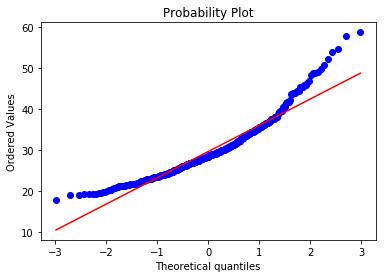

In [ ]:
from scipy import stats
stats.probplot(bmi_m_30_40, plot=plt, fit=True)
plt.show()

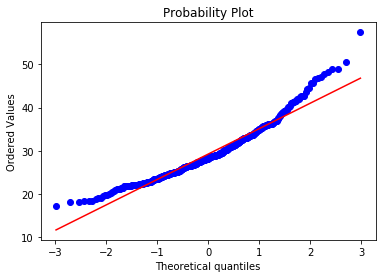

In [ ]:
stats.probplot(bmi_m_50_60, plot=plt, fit=True)
plt.show()

In [ ]:
#testing of two means using ttest unpooled because of the differences in std and the qq looks non-normal

bmi_30 = sm.stats.DescrStatsW(bmi_m_30_40)
bmi_50 = sm.stats.DescrStatsW(bmi_m_50_60)

sm.stats.CompareMeans(bmi_30, bmi_50).ztest_ind(usevar='unequal')

(0.8980221879527006, 0.3691737205589899)

__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

# From here, it is optional work: 

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [ ]:
# insert your code here

__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [ ]:
# insert your code here

__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

In [ ]:
# insert your code here

__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=796ba814-f632-4502-b0d7-7e2f8f9e546d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>